## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization.In this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute.

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 20000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import warnings
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
warnings.filterwarnings("ignore")
from collections import OrderedDict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset='train')

mydata_test = fetch_20newsgroups(subset='test')


In [ ]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output:
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [ ]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [ ]:
# Preprocessing the data

lines = []
word_list = []

# Removing HTML patterns like <br />
html_pattern = re.compile('<.*?>')

# Removing url's if any in the code
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# List of stop words
stop_words = set(stopwords.words('english'))

for line in text:
    #tokenize the text documents and update the lists word_list and lines
    review_cleaned = html_pattern.sub(r'', line)

    review_cleaned = url_pattern.sub(r'', review_cleaned)

    x = [i.lower() for  i in word_tokenize(review_cleaned) if i.isalpha() and i not in stop_words]
    lines.append(x)
    for word in x:
        if word not in word_list:
            word_list.append(word)

# Make sure the word_list contains unique tokens
word_list = set(word_list)

# Calculate the total documents present in the corpus
total_docs = len(lines)

#Create a dictionary to keep track of index of each word
dict_idx = {} #Dictionary to store index for each word
i = 0
for word in word_list:
    dict_idx[word] = i
    i += 1


In [ ]:
# Create a frequency dictionary

def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for word in word_list:
        freq_word[word] = 0
        for sent in lines:
            if word in sent:
                freq_word[word] += 1

    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'desj': 1,
 'gh': 8,
 'timo': 8,
 'oakland': 56,
 'describe': 105,
 'inroads': 2,
 'ciccarelli': 9,
 'beleivin': 1,
 'naughty': 4,
 'pric': 1,
 'fnald': 2,
 'rusinow': 1,
 'keith': 264,
 'retry': 4,
 'vwelch': 1,
 'ineffectiveness': 1,
 'ressurrections': 1,
 'exor': 1,
 'licks': 2,
 'arrow': 15,
 'sheds': 1,
 'mtz': 2,
 'fats': 1,
 'zanussi': 1,
 'shades': 12,
 'satified': 1,
 'goners': 1,
 'dialup': 6,
 'energized': 1,
 'cianfrocco': 1,
 'martyriologia': 1,
 'witchtrap': 1,
 'prupose': 2,
 'eeq': 1,
 'dissipates': 2,
 'kotnml': 2,
 'creatio': 1,
 'array': 39,
 'imbibed': 1,
 'approximate': 19,
 'ahatcher': 2,
 'enteric': 1,
 'responsibilty': 3,
 'unselfish': 2,
 'kovalev': 15,
 'chandler': 6,
 'yoking': 1,
 'qbqsrmm': 1,
 'shari': 1,
 'aggresive': 1,
 'validation': 5,
 'db': 32,
 'inspire': 6,
 'andoya': 1,
 'ingles': 7,
 'planitia': 1,
 'agnew': 1,
 'matt': 70,
 'gatt': 2,
 'whjjm': 3,
 'consistent': 98,
 'farwell': 3,
 'evade': 9,
 'inundate': 1,
 'paramedic': 2,
 'swine': 1,
 'the

In [ ]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    N = len(document)
    occurance = len([token for token in document if token == word])
    tf = occurance/N

    return tf

In [ ]:
# Create a function to calculate the Inverse Document Frequency

def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    try:
        word_occurance = freq_word[word]
    except:
        word_occurance = 1
    idf = np.log(total_docs/word_occurance)

    return idf

In [ ]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    for word in sentence:
        tf = term_frequency(sentence,word)
        idf = inverse_df(word)

        value = tf*idf
        tf_idf_vec[dict_idx[word]] = value

    return tf_idf_vec

In [ ]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

vectors = []
for sent in lines:
    vec = tfidf(sent,dict_idx)
    vectors.append(vec)

## Multinomial Naive Bayes (10 Points)

In [ ]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB()
model.fit(vectors, mydata_train.target)


MultinomialNB()

In [ ]:
#Perform testing on the train dataset

pred = model.predict(vectors)

In [ ]:
#Calculate the F1 Score and the Accuracy

F1_score = f1_score(mydata_train.target, pred, average = 'weighted')
Accuracy = accuracy_score(mydata_train.target, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9310977515158141
Accuracy:  0.9363620293441753


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly.
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [2]:
# install libraries
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=8eb387e86974e58d038197b8a95d737c382a219b77111641e112ab437bf46bde
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [3]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with.
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = {"Natural language processing": "Data Science",
          "Machine learning": "Data Science",
          "Quantum machine learning": "Data Science",
          "Artificial intelligence": "Data Science",
          "Master in Data Science": "Data Science",
          "Bank of America": "Bank",
          "Visa Inc.": "Bank",
          "HSBC": "Bank",
          "European Central Bank": "Bank",
          "International Monetary Fund": "Bank",
          "Basketball": "Sports",
          "Swimming": "Sports",
          "Tennis": "Sports",
          "Football":"Sports"}

# list of articles to be downloaded
articles = []
label = []
for topic, categ in topics.items():
    article = wikipedia.search(topic, results = 3)
    for i in article:
        articles.append(i)
        label.append(categ)

# download and store articles (summaries) in this variable
data = []
new_label = []
for i, article in enumerate(articles):
    try:
        a = wikipedia.summary(article, auto_suggest=False, redirect=True)
        data.append(a)
        new_label.append(label[i])
    except wikipedia.DisambiguationError as e:
        continue



### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):**

Clustering technique in general is very senstive to noise and outliers. Hence I have chosen to clean the data before applying T-SNE visualization technique.

In [4]:
# You can use Assignment 1's clean message function
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')



def clean_message(message):

    '''
    Input:
        message: message string
    Output:
        message_cleaned: processed message.

    '''
    # Converting the messages to lowercase
    message_cleaned = message.lower()

    # Removing HTML patterns like <br />
    html_pattern = re.compile('<.*?>')
    message_cleaned = html_pattern.sub(r'', message_cleaned)

    # Removing url's if any in the code
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    message_cleaned = url_pattern.sub(r'', message_cleaned)

    # List of stop words
    stop_words = set(stopwords.words('english'))

    # Tokenizing the words while removing punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    tokenwords = tokenizer.tokenize(message_cleaned)

    # Removing stop words using the list created above
    result = []
    for w in tokenwords:
      if w not in stop_words:
        result.append(w)

    # Lemmatizing the words
    # Performing lemmatization instead of suggested stemming as lemmatization improved the accuracy of the model
    lemmatizer = WordNetLemmatizer()
    message_cleaned = [lemmatizer.lemmatize(w) for w in result]

    # ps = PorterStemmer()
    # message_cleaned = [ps.stem(w) for w in result]

    # Joining the list of words back into a string
    message_cleaned = " ".join(message_cleaned)

    return message_cleaned



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
clean_message(data[0])

'natural language processing nlp interdisciplinary subfield computer science linguistics primarily concerned giving computer ability support manipulate human language involves processing natural language datasets text corpus speech corpus using either rule based probabilistic e statistical recently neural network based machine learning approach goal computer capable understanding content document including contextual nuance language within technology accurately extract information insight contained document well categorize organize document challenge natural language processing frequently involve speech recognition natural language understanding natural language generation'

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cleaned_data = []
for i in data:
    cleaned = clean_message(i)
    cleaned_data.append(cleaned)


In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(cleaned_data)
X = vectorizer.transform(cleaned_data)

In [8]:
print(X.shape)

(41, 2139)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [9]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(init='random',random_state=42).fit_transform(X)

Plot and annotate the points with different markers for different expected groups.

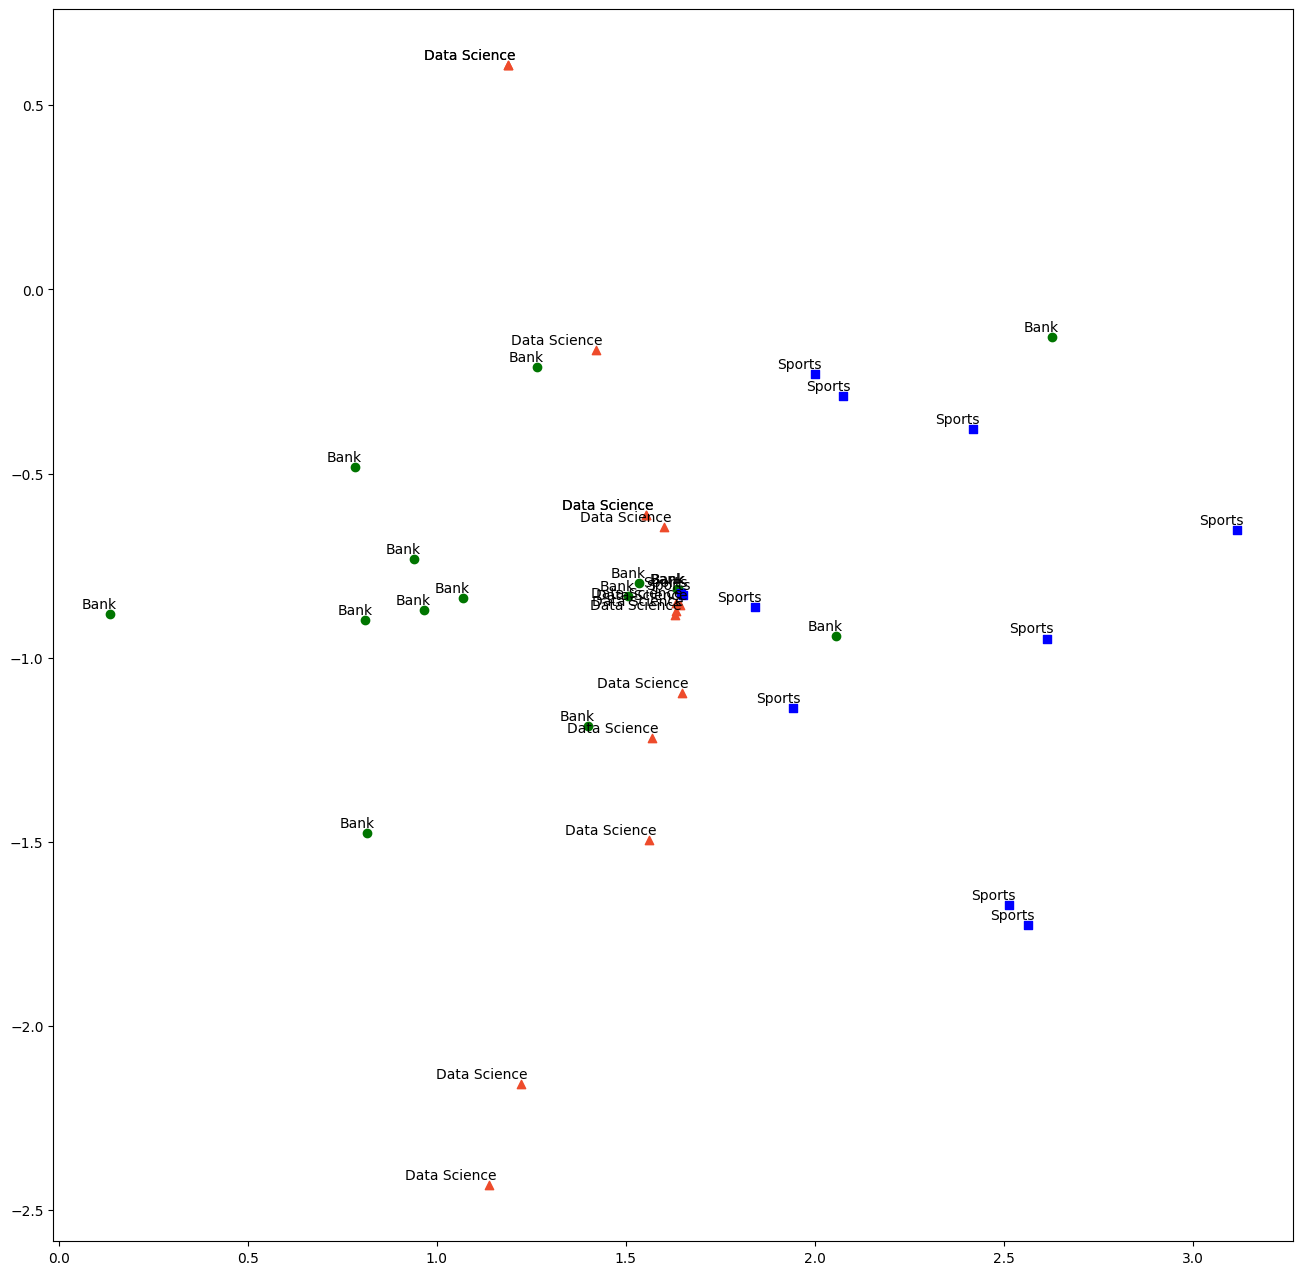

In [10]:
import matplotlib.pyplot as plt

x = []
y = []
for value in tsne:
    x.append(value[0])
    y.append(value[1])

# get a figure handle
fig, ax = plt.subplots(figsize=(16, 16))

marker_dic = {"Data Science": "^", "Sports": "s", "Bank": "o"}
color_dic = {"Data Science": "#EE4B2B", "Sports": "b", "Bank": "#007500"}

for i in range(len(x)):
    ax.scatter(x[i], y[i], marker=marker_dic[label[i]], c=color_dic[label[i]])
    ax.annotate(label[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')

plt.show()


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


T-SNE has done a fairly good job is categorizing the articles. We can see topics related to Bank are mostly clustered towards the left. Major Sports topics are found to the right side of the plot and Data Science topics are clustered towards the center of the figure. We also notice that there is quite some overlap of topics right at the very center of the image.

# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc..,

### We are providing train.txt and val.txt files along with this notebook.

### Library Imports and Utility functions

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [3]:
# Import the train.txt and val.txt file into pandas dataframe format

columns = ['Text', 'Target']
# train
train_df = pd.read_csv('train.txt', sep = ';', header = None, names = columns)

# validation
validation_df = pd.read_csv('val.txt', sep = ';', header = None, names = columns)

# and printout the train.shape and validation.shape
print(train_df.shape)
print(validation_df.shape)

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

(16000, 2)
(2000, 2)


In [7]:
# clean the text in the train and validation dataframes using the clean_text function provided above
# Train data
for (index, row) in train_df.iterrows():
    row['Text'] = clean_text(row['Text'])
# Validation data
for (index, row) in validation_df.iterrows():
    row['Text'] = clean_text(row['Text'])

In [8]:
# initialise count vectorizer from sklearn module with default parameter
cv = CountVectorizer()

# fit on train dataset and transform both train and validation dataset
# train data
train_cntvect = cv.fit_transform(train_df['Text'])
# validation data
validation_cntvect = cv.transform(validation_df['Text'])

In [9]:
# initialise tfidf vectorizer from sklearn module with default parameter
tfIdf = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset
# train data
train_tfidf = tfIdf.fit_transform(train_df['Text'])
#test data
validation_tfidf = tfIdf.transform(validation_df['Text'])

In [10]:
# initialise label encoder from sklearn module
L_encoder = preprocessing.LabelEncoder()

# fit on train labels and transform both train and validation labels
# train data
train_le= L_encoder.fit_transform(train_df['Target'])
# validation data
validation_le = L_encoder.transform(validation_df['Target'])

In [11]:
# convert the labels into one hot encoding form
L_binarizer = preprocessing.LabelBinarizer()

# train data
train_oh = L_binarizer.fit_transform(train_df['Target'])
# validation data
validation_oh = L_binarizer.transform(validation_df['Target'])

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (20 points)

In [12]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))

    # layer 2 : add the dense layer with 2048 units and relu activation
    out = tf.keras.layers.Dense(2048, input_dim = X.shape[1] , activation = 'relu')(inp)

    # layer 3 : add the dropout layer with dropout rate of 0.5
    out = tf.keras.layers.Dropout(0.5, input_shape=(2048, ))(out)

    # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
    out = tf.keras.layers.Dense(1024, input_dim = (2048, ), activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2())(out)

    # layer 5 : add the dropout layer with dropout rate of 0.5
    out = tf.keras.layers.Dropout(0.5, input_shape=(2048,))(out)

    # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
    out = tf.keras.layers.Dense(512, input_dim = (1024,), activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2())(out)

    # layer 7 : add the dropout layer with dropout rate of 0.5
    out = tf.keras.layers.Dropout(0.5, input_shape=(512,))(out)

    # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
    out = tf.keras.layers.Dense(256, input_dim = (512,), activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2())(out)

    # layer 9 : add the dropout layer with dropout rate of 0.5
    out = tf.keras.layers.Dropout(0.5, input_shape=(256,))(out)

    # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
    out = tf.keras.layers.Dense(128, input_dim = (256,), activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2())(out)

    # layer 11 : add the dropout layer with dropout rate of 0.5
    out = tf.keras.layers.Dropout(0.5, input_shape=(128,))(out)

    # layer 12 : output layer with units equal to number of classes and activation as softmax
    out = tf.keras.layers.Dense(6, activation = 'softmax')(out)

    # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy
    model = tf.keras.models.Model(inputs=inp, outputs=out)
    optimizer = tf.keras.optimizers.RMSprop()
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = optimizer,
                  metrics = ['AUC', 'Precision', 'Recall', 'accuracy',])


    return model


In [13]:
# call the build_model function and initialize the model
cntvect_model = build_model(train_cntvect)
cntvect_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13435)]           0         
                                                                 
 dense (Dense)               (None, 2048)              27516928  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0     

In [16]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)

from scipy.sparse import csr_matrix
train_cntvect_np = np.array(train_cntvect.todense())
validation_cntvect_np = np.array(validation_cntvect.todense())

training_cntvect = cntvect_model.fit(train_cntvect_np, train_oh,
                                     batch_size=8, epochs=10,
                                     validation_data=(validation_cntvect_np, validation_oh))


Epoch 1/10
2000/2000 [==============================] - 890s 444ms/step - loss: 2.3457 - auc: 0.7982 - precision: 0.5856 - recall: 0.1552 - accuracy: 0.4212 - val_loss: 1.3174 - val_auc: 0.8717 - val_precision: 0.7220 - val_recall: 0.3350 - val_accuracy: 0.5805
Epoch 2/10
2000/2000 [==============================] - 868s 434ms/step - loss: 1.2772 - auc: 0.8888 - precision: 0.7195 - recall: 0.4599 - accuracy: 0.6206 - val_loss: 1.2192 - val_auc: 0.9048 - val_precision: 0.7327 - val_recall: 0.5810 - val_accuracy: 0.6875
Epoch 3/10
2000/2000 [==============================] - 878s 439ms/step - loss: 1.1799 - auc: 0.9105 - precision: 0.7399 - recall: 0.5692 - accuracy: 0.6759 - val_loss: 1.2298 - val_auc: 0.9071 - val_precision: 0.7359 - val_recall: 0.5755 - val_accuracy: 0.6770
Epoch 4/10
2000/2000 [==============================] - 863s 431ms/step - loss: 1.1189 - auc: 0.9221 - precision: 0.7607 - recall: 0.6214 - accuracy: 0.7059 - val_loss: 1.1651 - val_auc: 0.9152 - val_precision: 0.7

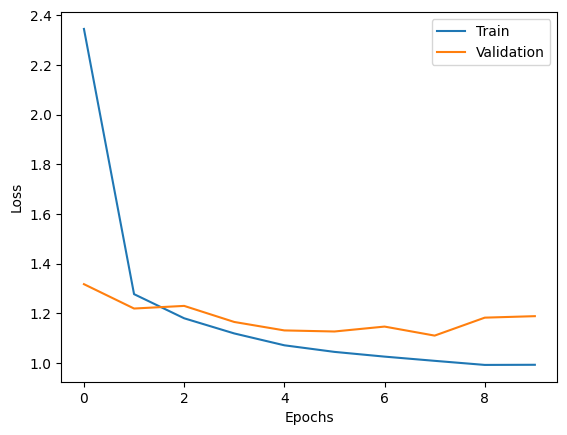

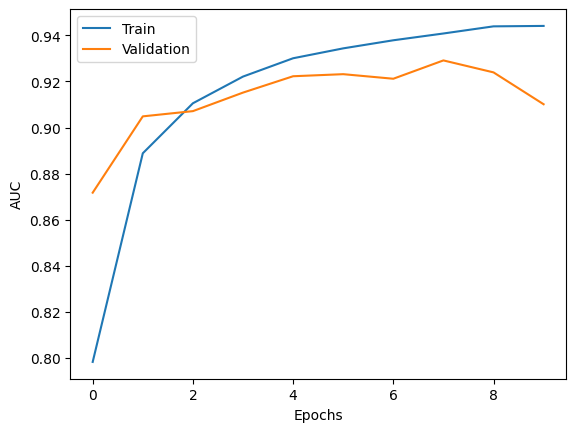

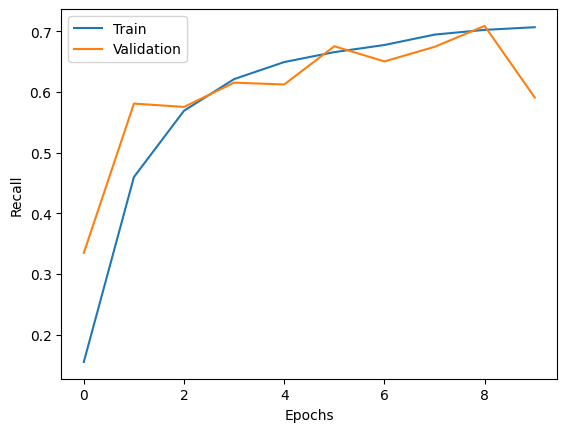

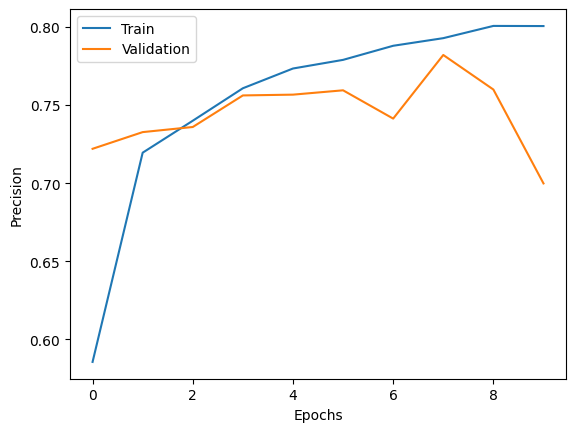

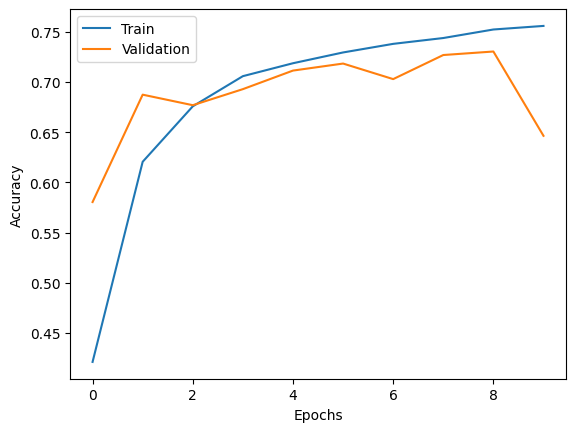

In [18]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

# Loss
plt.plot(training_cntvect.history['loss'])
plt.plot(training_cntvect.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# AUC
plt.plot(training_cntvect.history['auc'])
plt.plot(training_cntvect.history['val_auc'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.show()

# Recall
plt.plot(training_cntvect.history['recall'])
plt.plot(training_cntvect.history['val_recall'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

# Precision
plt.plot(training_cntvect.history['precision'])
plt.plot(training_cntvect.history['val_precision'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.show()

# Accuracy
plt.plot(training_cntvect.history['accuracy'])
plt.plot(training_cntvect.history['val_accuracy'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

We can see that the metrics like Accuracy, AUC, Precision and Recall increase with the epochs and the loss deacreases with the increase in epochs. We can see a train accuracy close to 75% and validation accuracy close to 70% with the count vectorizer. The AUC value is in the range of 90-95% for the train and validation datasets. The precision is around 77% for the train dataset and 72% for the validation dataset. We can see ups and downs in the validation metrics but where as the training metrics vary gradually.

In [19]:
# again call the build_model function and initialize the model
tfidf_model = build_model(train_tfidf)
tfidf_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13435)]           0         
                                                                 
 dense_6 (Dense)             (None, 2048)              27516928  
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0   

In [20]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)
train_tfidf_np = np.array(train_tfidf.todense())
validation_tfidf_np = np.array(validation_tfidf.todense())

training_tfidf = tfidf_model.fit(train_tfidf_np, train_oh,
                                 batch_size=8, epochs = 10,
                                 validation_data=(validation_tfidf_np, validation_oh))


Epoch 1/10
2000/2000 [==============================] - 850s 424ms/step - loss: 1.9269 - auc: 0.7957 - precision: 0.5460 - recall: 0.1164 - accuracy: 0.3903 - val_loss: 1.2862 - val_auc: 0.8706 - val_precision: 0.6729 - val_recall: 0.3055 - val_accuracy: 0.4970
Epoch 2/10
2000/2000 [==============================] - 845s 423ms/step - loss: 1.2426 - auc: 0.8883 - precision: 0.7041 - recall: 0.4112 - accuracy: 0.5893 - val_loss: 1.1676 - val_auc: 0.9072 - val_precision: 0.7439 - val_recall: 0.5460 - val_accuracy: 0.6585
Epoch 3/10
2000/2000 [==============================] - 821s 411ms/step - loss: 1.1332 - auc: 0.9150 - precision: 0.7453 - recall: 0.5658 - accuracy: 0.6712 - val_loss: 1.1321 - val_auc: 0.9143 - val_precision: 0.7518 - val_recall: 0.5650 - val_accuracy: 0.6820
Epoch 4/10
2000/2000 [==============================] - 822s 411ms/step - loss: 1.0760 - auc: 0.9255 - precision: 0.7608 - recall: 0.6148 - accuracy: 0.7036 - val_loss: 1.1505 - val_auc: 0.9102 - val_precision: 0.7

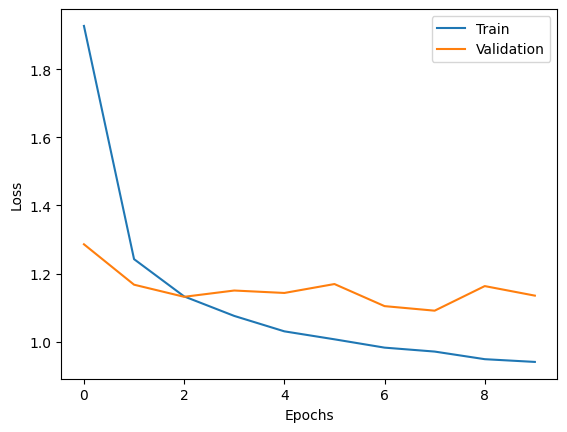

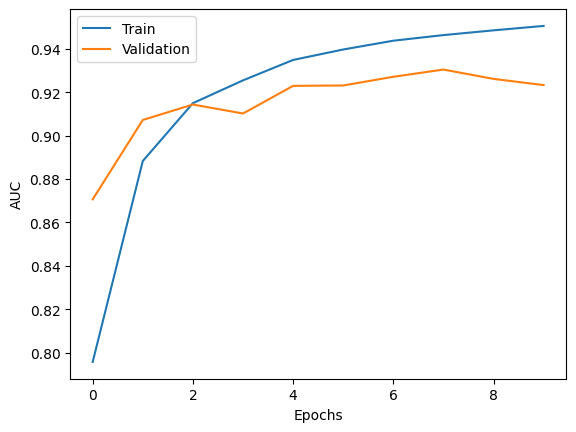

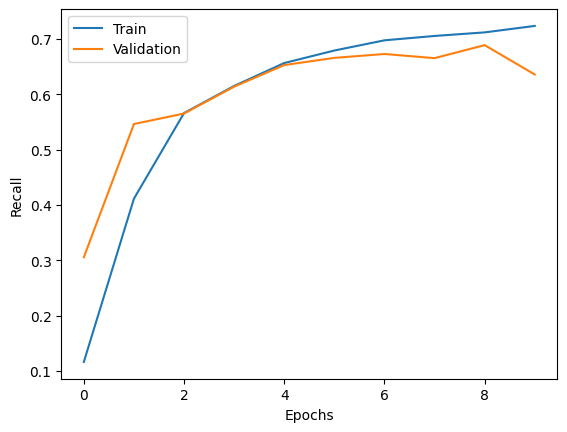

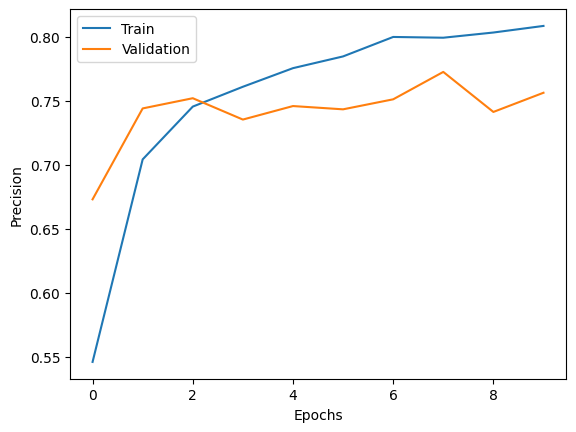

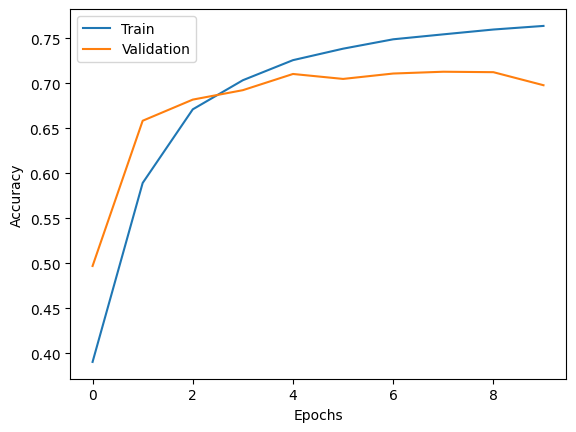

In [23]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

# Loss
plt.plot(training_tfidf.history['loss'])
plt.plot(training_tfidf.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# AUC
plt.plot(training_tfidf.history['auc'])
plt.plot(training_tfidf.history['val_auc'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.show()

# Recall
plt.plot(training_tfidf.history['recall'])
plt.plot(training_tfidf.history['val_recall'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

# Precision
plt.plot(training_tfidf.history['precision'])
plt.plot(training_tfidf.history['val_precision'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.show()

# Accuracy
plt.plot(training_tfidf.history['accuracy'])
plt.plot(training_tfidf.history['val_accuracy'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Similar to the plots above, we can see that the metrics like Accuracy, AUC, Precision and Recall increase with the epochs and the loss deacreases with the increase in epochs. We can see a train accuracy close to 75% and validation accuracy close to 68% with the tf-idf. The AUC value is in the range of 91-95% for the train and validation datasets. The precision is around 80% for the train dataset and 74% for the validation dataset.

**Comparison between count vectorizer and tf-idf model**\
\
The training and validation metrics for the models using count vectorizer and tf-idf seem similar with very slight variations. The difference between using count vectorizer and tf-idf is that count vectorizer does not take into count the importance of a word in a sentence, where as tf-idf takes the importance into consideration as well.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**\
\
**Count Vectorizer:**\
\
Count Vectorizer is a way to convert a given set of strings into a frequency representation. Count Vectors are helpful in understanding the type of text by the frequency of words in it. But it is not able to identify more important and less important words for analysis rather it will just consider words that are abundant in a corpus as the most statistically significant word. It also doesn't identify the relationships between words like linguistic similarity between words.\
\
**TF-IDF:**\
\
TF-IDF means Term Frequency - Inverse Document Frequency. It provides a numerical representation of how important a word is for statistical analysis. TF-IDF is better than Count Vectorizer because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. With this information we can remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions. But it fails to provide linguistic information about the words such as the real meaning of the words, similarity with other words. \
\
To train a model on the linguistic relationship of the words, "word2vec" and "Glove" can be used.\
\
**word2vec:**\
\
It uses small neural networks to calculate word embeddings based on words’ context. Word2Vec learns embeddings by relating target words to their context. However, it ignores whether some context words appear more often than others. For Word2Vec, a frequent co-occurrence of words creates more training examples, but it carries no additional information.\
\
**Glove:**\
\
GloVe builds word embeddings in a way that a combination of word vectors relates directly to the probability of these words’ co-occurrence in the corpus. GloVe stresses that the frequency of co-occurrences is vital information and should not be left as additional training examples.


What is the significant difference between the Naive Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**\
Bag of Words just creates a set of vectors containing the count of word occurrences in the document, while the TF-IDF model contains information on the more important words and the less important ones as well.

Bag of Words vectors are easy to interpret. The Bag of Words method creates a sparse matrix of the vocabulary which results in increased computational time if the vocabulary size is huge. The bag-of-words approach completely ignores the importance of a word within a sentence, which is a disadvantage.

Meanwhile TF-IDF method is preferred in machine learning model as it contains information on the more important and less important words.

Thus from the above points, we can say that when Naive Bayes is implemented using Bag of Words the importance of a word within a sentence is ignored where as TF-IDF presents the model with the information about the importance of a word within a sentence.